
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/machine_learning_for_people/linear_regression/

medical-charges.csv


In [ ]:
medical_df = pd.read_csv("drive/MyDrive/machine_learning_for_people/linear_regression/medical-charges.csv")

In [ ]:
medical_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для вирішення задачі прогнозування колонки charges на основі інших колонок без використання методів машинного навчання:

1. Можна здійснити прогнозування через групування даних. Дані для кожної групи (наприклад, за категорією "курець"/"не курець", "стать", "регіон") згрупувати і на основі середнього значення чи медіанного середнього з цих груп робити прогноз.
2. Проаналізувати залежність між змінними:
Обчислити коефіцієнти кореляції між charges та іншими змінними.
Якщо є сильні кореляції можна передбачити charges як функцію цих змінних.

3. Для категоріальних змінних, які мають дві категорії (наприклад, sex: чоловіки та жінки або smoker: курці та некурці), можна обчислити відсоткову різницю між середніми значеннями charges для кожної категорії.
Це дозволить оцінити, наскільки відрізняються витрати між різними категоріями. Наприклад, на скільки відсотків витрати курців вищі, ніж у некурців.
Після того, як ми отримали відсоткову різницю для кожної категорії, можна використати ці коефіцієнти для корекції базового прогнозу.
Якщо базовий прогноз для медичних зборів становить $5000, а відсоткова різниця для курців складає 30%, то для курця прогнозовані витрати можна коригувати таким чином: 5000×(1+0.30)=6500
Для некурця з тією ж базою прогнозу відсоткова різниця може бути від'ємною або меншою, і медичні збори для некурця будуть нижчими, відповідно.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
# Візуалізація розподіду медичних зборів (charges) за ознакою Sex
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=px.colors.sequential.Agsunset,
    width=800,
    height=500,
    title='Annual Medical Charges with sex'
)

fig.update_layout(bargap=0.1)
fig.show()


Ми можемо зробити наступні спостереження з вищенаведеного графіку:

Медіана для жінок становить \$9413, a для чоловіків \$9370, тобто медіани є близькими. Це означає, що середні значення медичних зборів для цих двох груп приблизно однакові. В той же час розподіл медичних зборів у чоловіків більш розкиданий, на що вказує більш ширша коробка боксплоту та довші "вусики".

Наявність викидів: У обох груп є окремі випадки з дуже високими зборами, які відхиляються від загальної тенденції. Це можуть бути випадки тривалого лікування або дорогих медичних процедур.


In [ ]:
# Візуалізація розподіду медичних зборів (charges) за ознакою Region
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=px.colors.sequential.Blackbody,
    width=800,
    height=500,
    title='Annual Medical Charge with regions'
)

fig.update_layout(bargap=0.1)
fig.show()

Висновки:


Для більшості клієнтів у кожному регіоні річні медичні збори становлять менше \$10,000.

Регіон "Southeast" має вищий медіанний рівень зборів порівняно з іншими регіонами, що вказує на більшу середню вартість зборів в цьому регіоні порівняно з іншими.

Найбільші викиди спостерігаються в регіоні "Southeast", де деякі особи платять понад \$60,000.

У регіоні "Southeast" спостерігається найбільший розкид зборів, що вказує вказувати на високий рівень варіативності у зборах.

Цей аналіз показує, що медичні збори мають помітну різницю залежно від регіону, причому регіон "Southeast" виділяється як з більш високими медіанними зборами, так і з найбільшими викидами.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
#Розподіл ознаки Region відносно того, чи людина курцем
fig = px.histogram(
    medical_df,
    x='region',
    color='smoker',
    color_discrete_sequence=px.colors.sequential.Magenta,
    width=800,
    height=500,
    title='Розподіл стопця Region відносно того, чи людина курцем'
)

fig.show()



Висновки:

Більшість людей у всіх регіонах є некурцями.
Регіон southeast має найвищу кількість курців, що може свідчити про локальні особливості (соціальні чи культурні).

In [ ]:
# Візуалізація розподілу ознаки Сhildren відносно того, чи є людина курцем
fig2 = px.histogram(
    medical_df,
    x="children",
    color="smoker",
    barmode="group",
    title='Розподіл стопця Children відносно того, чи людина курцем',
    color_discrete_sequence=px.colors.sequential.Magenta
)
fig2.show()

Висновки:

Клієнти без дітей (children = 0) складають найбільшу частину вибірки, і серед них курців більше, ніж у групах із дітьми.

Некурці переважають у кожній групі, незалежно від кількості дітей.

Курців менше серед людей з більшою кількістю дітей, що може свідчити про зростання відповідальності через батьківство.

Для сімей із 4 або 5 дітьми вибірка дуже мала, висновки робити складно.



**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
# Візуалізація зв'язку між стовпцем charges та children за допомогою графіків-скрипок
fig = px.violin(
    medical_df,
    x="children",
    y="charges",
    box=True,
    title="Distribution of Charges by Number of Children",
    labels={"children": "Number of Children", "charges": "Charges"},
    color="children",
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.show()

Спостереження:

Група клієнтів без дітей має один із найбільших розкидів значень серед усіх груп, що свідчить про велику варіативність медичних зборів.

Групи клієнтів з 4 і 5 дітьми мають менший розкид значень в порівнянні з іншими групами, медичні збори виглядають стабільніше.

Для клієнтів з 5 дітьми спостерігається деяке зниження середніх медичних зборів порівняно з сім’ями з 2, 3 і 4 дітьми. Це може бути пов’язано певними особливостями медичного обслуговування для великих сімей.

В групі клієтів, що мають 5 дітей практично відсутні викиди.

У клієгтів без дітей спостерігається значно більший діапазон витрат на медичні збори, ніж у тих, хто має одну або більше дітей.



**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

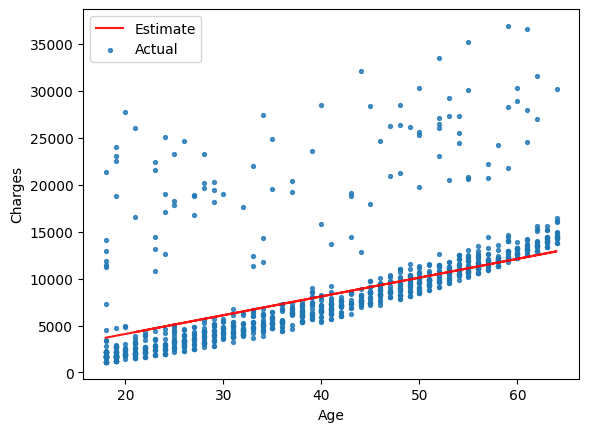

In [ ]:
try_parameters(non_smoker_df, 200, 100)

w у нас відповідає за кут нахилу, тому збільшимо w до 250

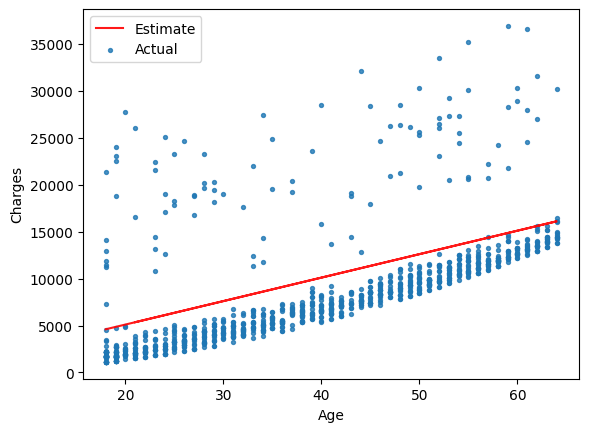

In [ ]:
try_parameters(non_smoker_df, 250, 100)

Нам вдалося змінити кут, але лінія змістилася вище, спробуємо задати b від'ємне значення.

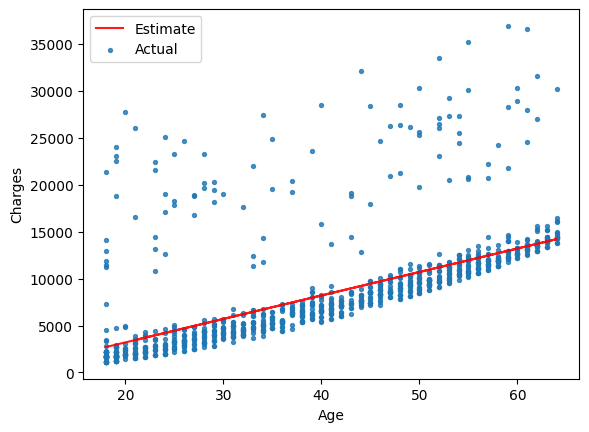

In [ ]:
try_parameters(non_smoker_df, 250, -1800)

Дивлячись на графік можна відмітити, що пряма приблизно слідує тренду, можна було б ще трохи збільшити значення w i збільшити від'ємне значення b.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
import numpy as np

def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4779.5540037235605


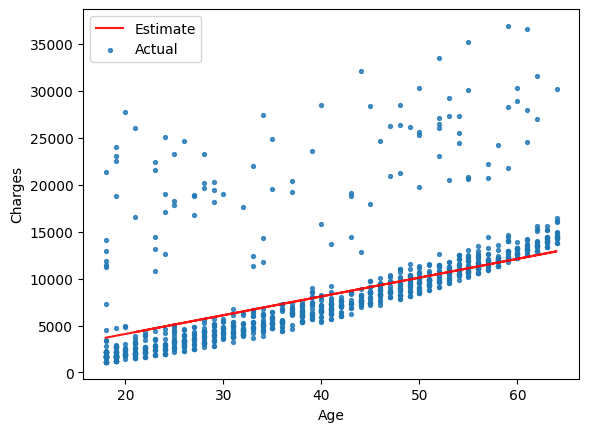

In [ ]:
try_parameters(non_smoker_df, 200, 100)

значення RMSE для першої пари параметрів становить 4779.5540037235605

RMSE Loss:  4907.571788102452


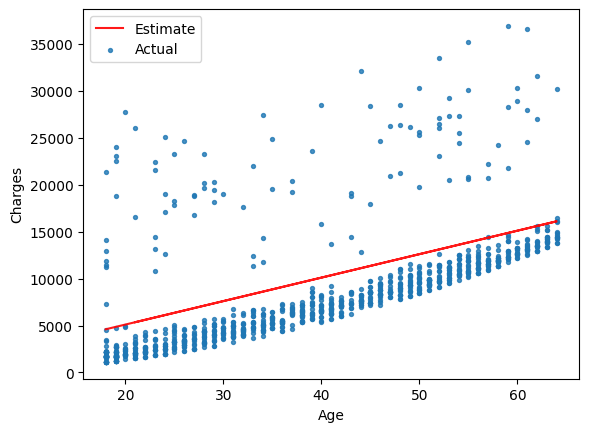

In [ ]:
try_parameters(non_smoker_df, 250, 100)

значення RMSE для другої пари параметрів збільшилось становить 4907.571788102452

RMSE Loss:  4684.912908332581


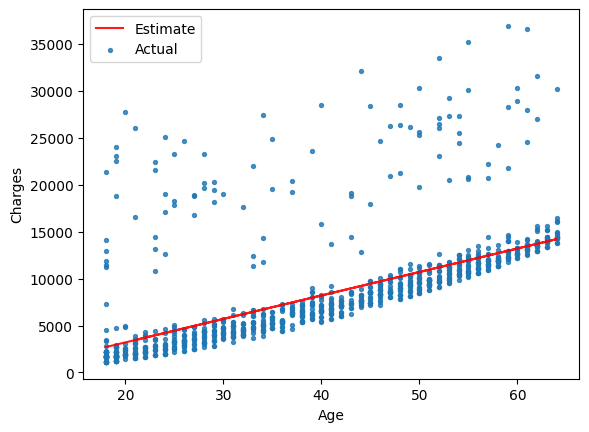

In [ ]:
try_parameters(non_smoker_df, 250, -1800)

В третій спробі вдалося досягти значення RMSE 4684.912908332581.

RMSE Loss представляє втрату інформації побудованою моделлю: чим нижче втрата, тим краща модель.

Загальна стратегія така: змінювати значення w, що відповідає за кут нахилу прямої та b, що відповідає за зміщення прямої, візуалізуючи кожну спробу та  орієнтуючись на те, щоб показник RMSE ставав меншим.